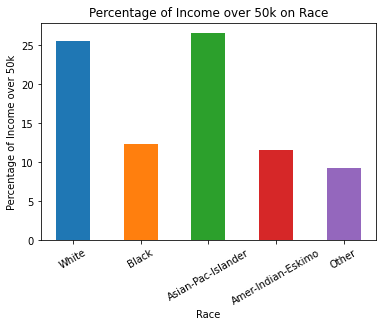

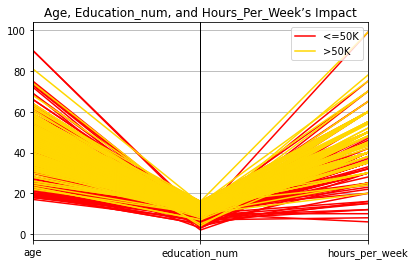

above 50K income


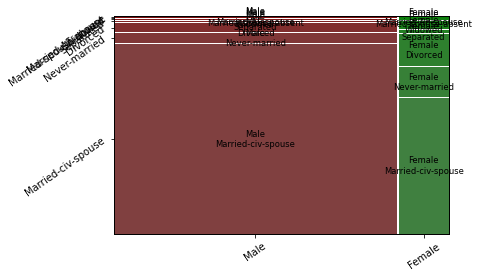

below 50K income


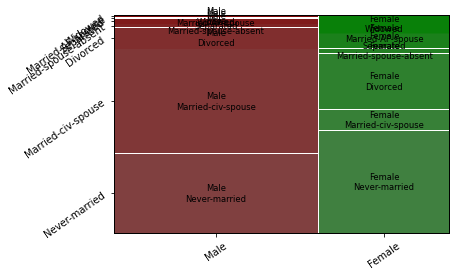

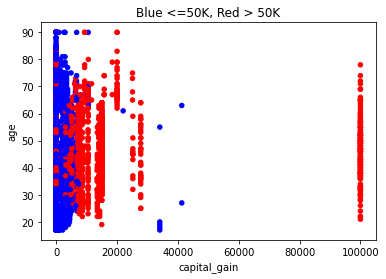

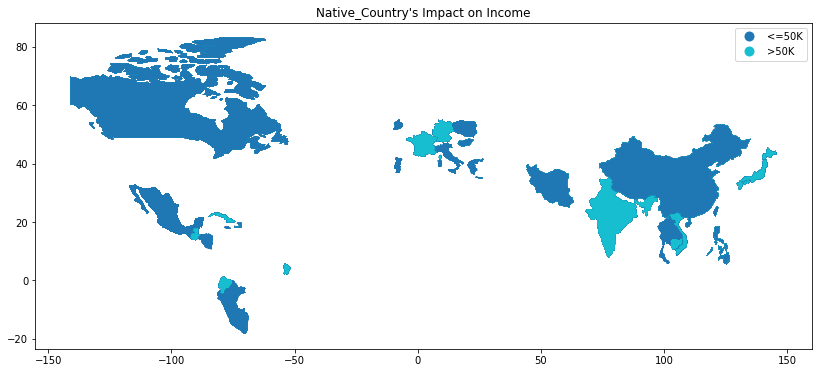

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline
from pandas.plotting import parallel_coordinates
import geopandas as gpd

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df = pd.read_csv("adult.data", names = col_names, header = None)

#remove question mark
for col in col_names:
    if not isinstance(df[col][0],np.int64):
        df[col] = df[col].apply(lambda x : x.strip() if x.strip() != '?' else None)


# above 50k income is larger_section
df['larger_section'] = (df['income'] == '>50K') * 1

# scenario1: race impact on income
races = df['race'].values
sum = len(races)

count1 = {} # count the sum of each race
count2 = {} # count the num of over 50k on each race
for i in range(sum):
    if not races[i] in count1:
        count1[races[i]] = 0
        count2[races[i]] = 0

    count1[races[i]] = count1[races[i]] + 1

    if df['income'][i] == '>50K':
        count2[races[i]] = count2[races[i]] + 1

percentage = {}
for r in count1.keys():
    if not r in percentage:
        percentage[r] = 0
    percentage[r] = count2[r] * 100 / count1[r]
    # print(percentage[r])
    plt.bar(r, percentage[r], width= 0.5)  

plt.xticks(rotation = 30)
plt.xlabel('Race')
plt.ylabel('Percentage of Income over 50k')
plt.title('Percentage of Income over 50k on Race')

plt.show()

#scenario2: combination of age, education_num, and hours_per_week’s impact on income
plt.close()

pc_frame = df[['age', 'education_num', 'hours_per_week']].copy()

pc_frame['income'] = df['income']
pc_frame['larger_section'] = df['larger_section']
# print(pc_frame['larger_section'])
pc_frame.columns = ['age', 'education_num', 'hours_per_week', 'income', 'larger_section']

pc_below_50K = pc_frame[pc_frame['larger_section'] == 0].sample(n = 200)
pc_above_50K = pc_frame[pc_frame['larger_section'] == 1].sample(n = 200)
pc_frame = pd.concat([pc_below_50K, pc_above_50K])

parallel_coordinates(pc_frame, class_column = 'income', cols = ['age', 'education_num', 'hours_per_week'], color=('#FF0000','#FFD700'))
plt.title("Age, Education_num, and Hours_Per_Week’s Impact")
plt.show()

#scenario3: the combination of sex and marital_status's impact on income
def mosaic_plot_class(col1, col2):
    plt.close()
    below_50K = df[df['income'] == '<=50K']
    above_50K = df[df['income'] == '>50K']

    print("above 50K income")
    mosaic(above_50K, [col1, col2], label_rotation = 35)
    plt.show()

    print("below 50K income")
    mosaic(below_50K, [col1, col2], label_rotation = 35)
    plt.show()

mosaic_plot_class('sex', 'marital_status')   

#scenario4: the combination of capital_gain and age’s impact on income
plt.close()
sp_frame = df[['capital_gain', 'age', 'income']].copy()
# print(sp_frame)
colors = df['larger_section'].map({0:'b', 1:'r'})
sp_frame.plot.scatter(x = 'capital_gain', y = 'age', c = colors)
plt.title("Blue <=50K, Red > 50K")
plt.show()

#Scenario 5: the native_country's impact on income
plt.close()
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.head()
# print(gdf)
map_frame = df[['native_country', 'income']].copy()
# print(country)
merged_country = gdf.merge(map_frame, left_on = 'name', right_on = 'native_country', how = 'right')
# print(merged_country)
plt.rcParams["figure.figsize"] = (25,6)
merged_country.plot(column = 'income', legend = True)
plt.title("Native_Country's Impact on Income")
plt.show()
# plt.close()

